In [16]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pymc3 as pm

import scipy
import scipy.stats as stats
from scipy.special import beta as B, comb
scipy.__version__

In [2]:
n_trials = [1, 3, 4, 8, 15, 50, 500, 750, 1000, 2000]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# On-line Learning 

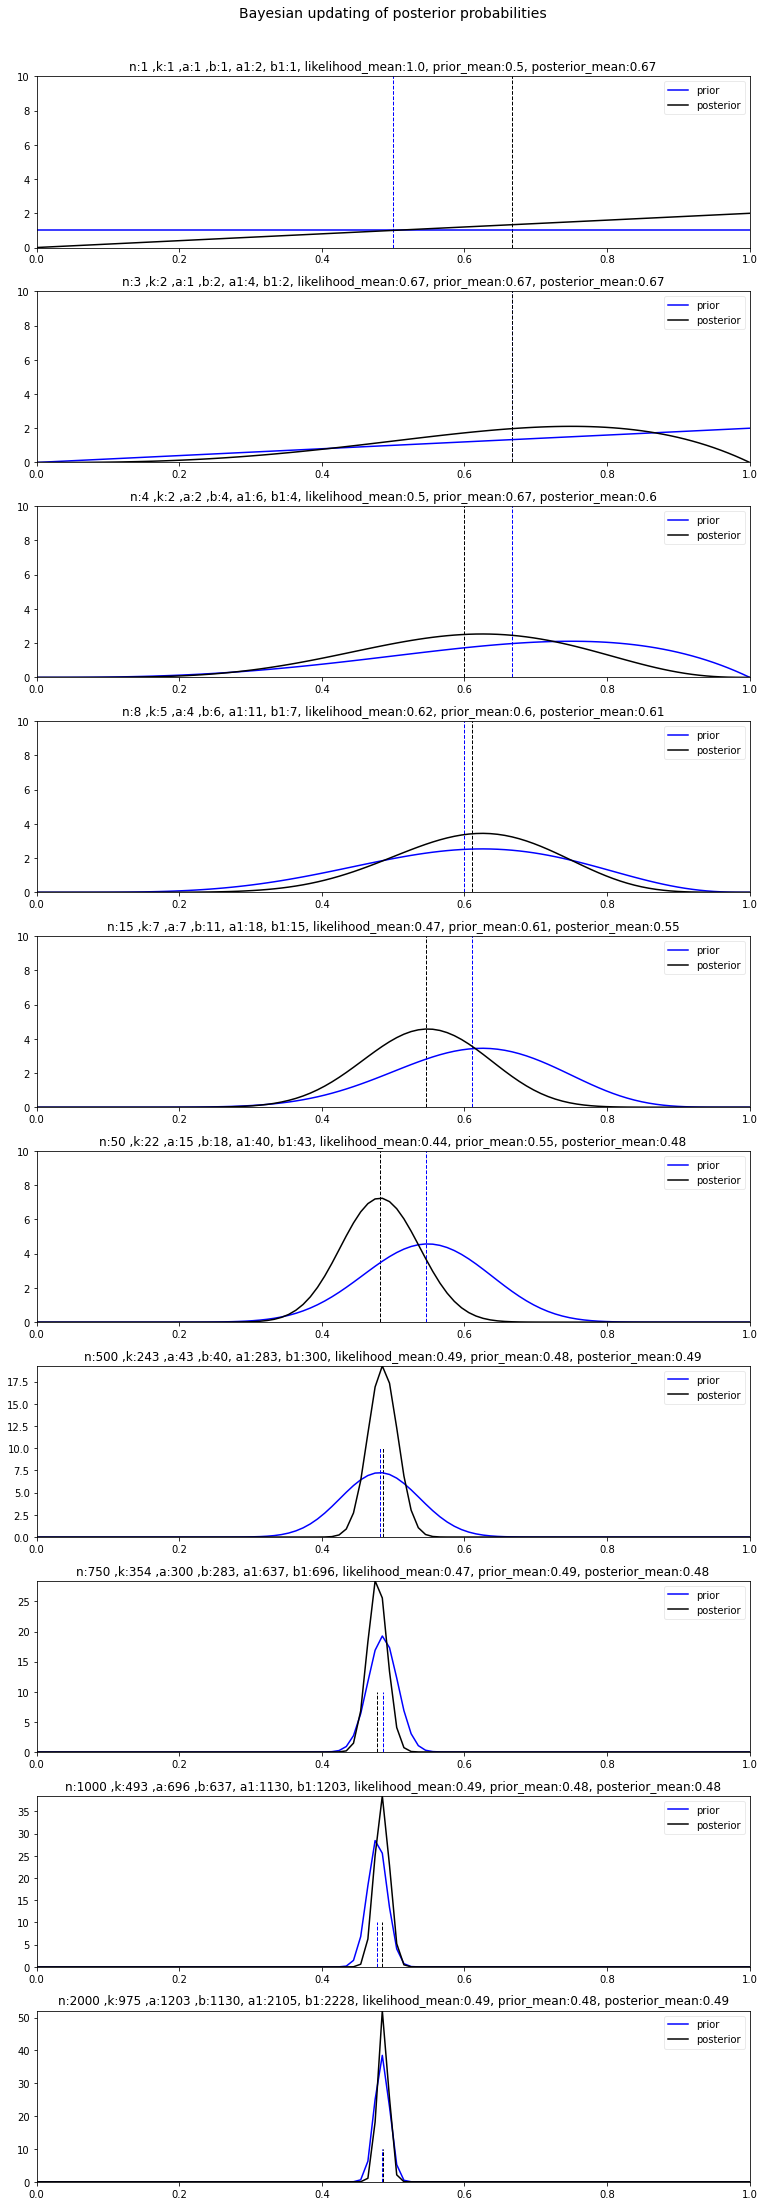

In [37]:
figsize(11, 30)
betabinom_pmf = lambda k, n, a, b, a1, b1: comb(n,k) * B(a1, b1) / B(a,b)
a = 1
b = 1
for i, n in enumerate(n_trials):
    k = data[0:n].sum()
    prior = stats.beta.pdf(x, a=a, b=b)
    a1 = a+k
    b1 = n+b-k
    posterior = stats.beta.pdf(x, a=a1, b=b1)
    sx = plt.subplot(len(n_trials), 1, i+1)

    plt.plot(x, prior, label="prior", color="blue")
    plt.vlines(a/(a+b), 0, 10, color="blue", linestyles="--", lw=1)
    plt.plot(x, posterior, label="posterior", color="black")
    plt.vlines(a1/(a1+b1), 0, 10, color="black", linestyles="--", lw=1)
    
    s = "n:" + str(n) + " ,k:" + str(k) + \
    " ,a:" + str(b) + " ,b:" + str(a) + ", a1:" + str(a1) + ", b1:" + str(b1) + \
    ", likelihood_mean:" + str(round(k/n ,2)) + \
    ", prior_mean:" + str(round(a/(a+b) ,2)) + \
    ", posterior_mean:" + str(round(a1/(a1+b1) ,2))
    plt.title(s)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
    #plt.plot(np.arange(k), betabinom_pmf(np.arange(k), n, a, b, a1, b1), color="red")
    a = a1
    b = b1

plt.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)
plt.tight_layout()

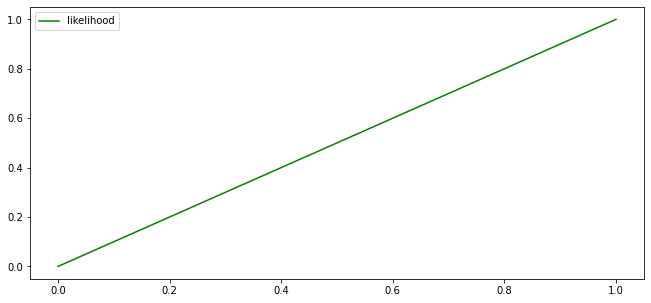

In [35]:
figsize(11, 5)
likelihood= stats.bernoulli.pmf(k=1, p=x)
plt.plot(x, likelihood, label="likelihood", color="green")
plt.legend();

C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


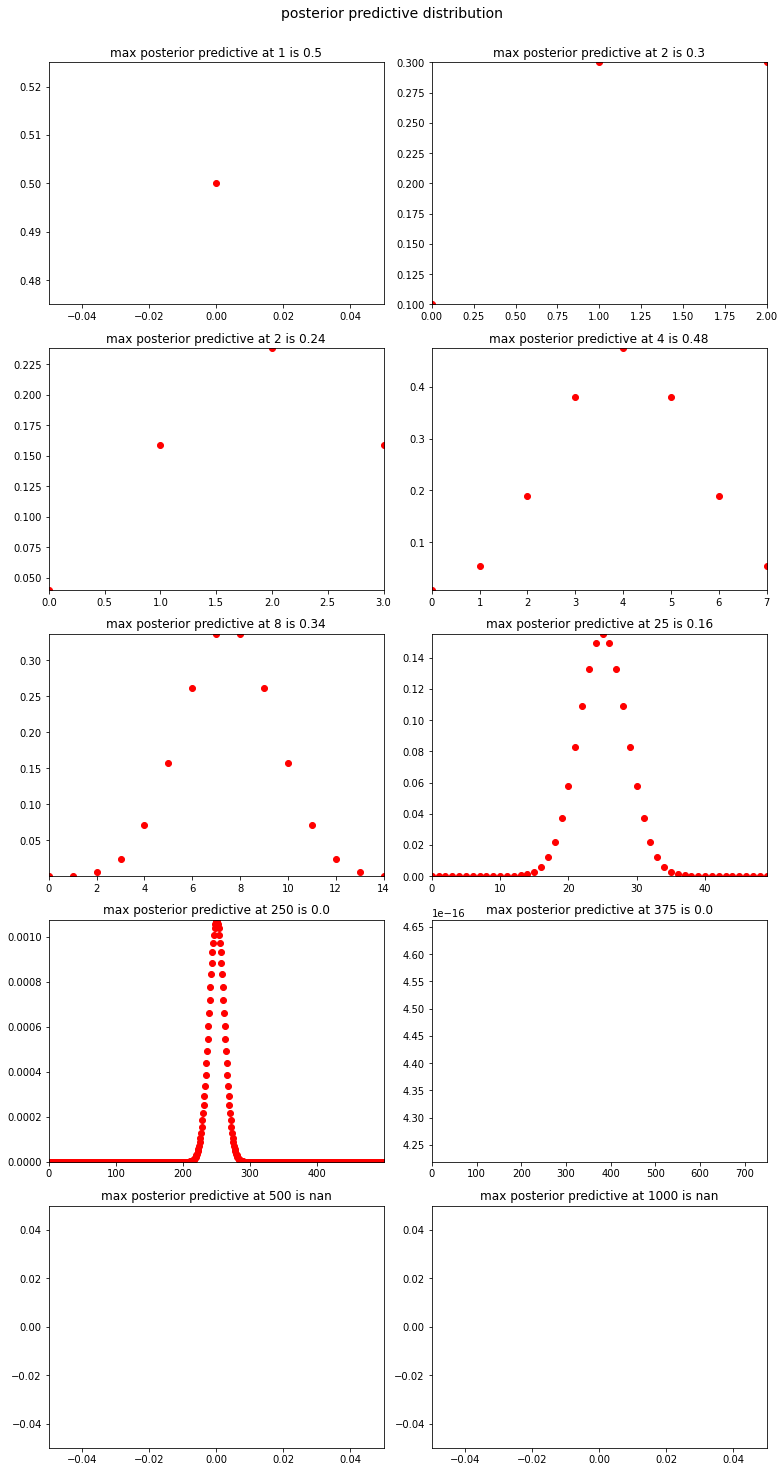

In [5]:
figsize(11, 20)
from math import ceil
betabinom_pmf = lambda k, n, a, b, a1, b1: comb(n,k) * B(a1, b1) / B(a,b)
a = 1
b = 1
for i, n in enumerate(n_trials):
    k = data[0:n].sum()
    prior = stats.beta.pdf(x, a=a, b=b)
    a1 = a+k
    b1 = n+b-k
    posterior = stats.beta.pdf(x, a=a1, b=b1)
    pp = betabinom_pmf(ceil(n/2), n, a, b, a1, b1)
    sx = plt.subplot(ceil(len(n_trials)/2), 2, i+1)
    plt.scatter(np.arange(n), betabinom_pmf(np.arange(n), n, a, b, a1, b1), color="red")
    plt.title("max posterior predictive at " + str(ceil(n/2)) + " is " + str(round(pp, 2)))
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
    a = a1
    b = b1

plt.suptitle("posterior predictive distribution", y=1.02, fontsize=14)
plt.tight_layout()

# using pymc3
Let's see how mean changes when we gather more an more sample data

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:05<00:00, 744.29draws/s]


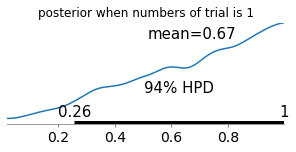

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:06<00:00, 632.16draws/s]


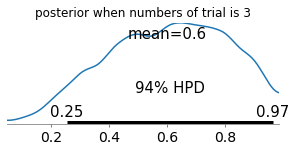

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:06<00:00, 633.59draws/s]


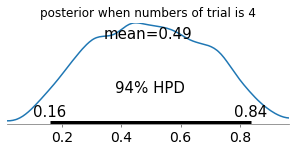

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:07<00:00, 566.44draws/s]
The acceptance probability does not match the target. It is 0.8944507160722922, but should be close to 0.8. Try to increase the number of tuning steps.


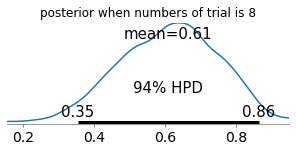

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:07<00:00, 561.11draws/s]


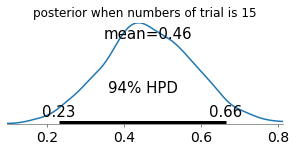

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:08<00:00, 497.42draws/s]


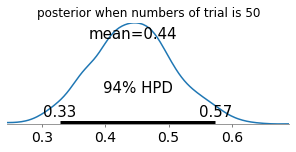

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:21<00:00, 189.05draws/s]


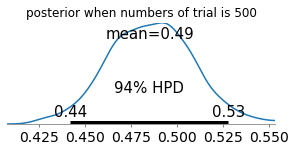

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:25<00:00, 157.26draws/s]


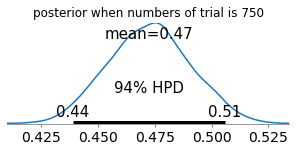

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:30<00:00, 130.96draws/s]


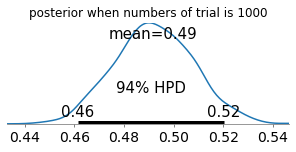

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:54<00:00, 73.00draws/s]


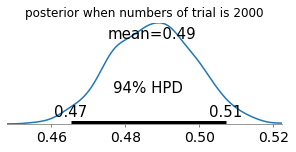

In [24]:
figsize(4, 2)

for i, n in enumerate(n_trials):
    with pm.Model() as model:
        p = pm.Beta("p", 1, 1)
        pm.Bernoulli("cointoss", p=p, observed=data[0:n])
        trace = pm.sample(1000, tune=1000, cores=2)
    #sx = plt.subplot(np.ceil(len(n_trials)/2), 2, i+1)
    pm.plot_posterior(trace, ["p"])
    #sns.distplot(trace["p"])
    plt.title("posterior when numbers of trial is {}".format(n))
    plt.autoscale(tight=True)
    plt.show()
    